In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Input
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [ ]:
# Cargar los datos
data = pd.read_csv('datos_Norte_no_norm.csv')
data.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,SO2,SR,TOUT,WSR,WDV
0,7.46,0.1304,0.0432,0.1735,0.012,522.0,369.16,715.7,76.5,0.0042,0.0,17.05,3.8,18.0
1,4.16,0.0562,0.0411,0.0972,0.009,712.0,299.29,715.5,79.0,0.0040,0.0,15.87,4.5,15.0
2,3.19,0.0424,0.0379,0.0802,0.007,586.0,201.58,715.1,77.7,0.0038,0.0,15.41,4.8,28.0
3,3.10,0.0461,0.0349,0.0809,0.007,406.0,186.32,714.9,77.6,0.0037,0.0,14.58,2.8,26.0
4,3.20,0.0592,0.0335,0.0927,0.007,340.0,168.50,714.9,77.6,0.0038,0.0,13.84,4.1,28.0


In [ ]:
data.shape

(13870, 14)

In [ ]:
# Separar los datos

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV']]
y = data[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Modelo Secuencial

model = Sequential()
model.add(Input(shape=(1,6)))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.0001))
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(trainX,y_train,batch_size=96,epochs=300,verbose=1,validation_split=0.2,callbacks=[early_stopping,reduce_lr])
model.evaluate(testX,y_test)

Epoch 1/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.5247 - val_loss: 13.2280 - learning_rate: 1.0000e-04
Epoch 2/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5393 - val_loss: 13.1946 - learning_rate: 1.0000e-04
Epoch 3/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5848 - val_loss: 13.1578 - learning_rate: 1.0000e-04
Epoch 4/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4692 - val_loss: 13.1067 - learning_rate: 1.0000e-04
Epoch 5/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2504 - val_loss: 13.0307 - learning_rate: 1.0000e-04
Epoch 6/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.9423 - val_loss: 12.9173 - learning_rate: 1.0000e-04
Epoch 7/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4029 - val_loss: 12.7801 - learning_rate: 1.0000e-04
Epoch 8/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9706 - val_loss: 12.6417 - learning_rate: 1.0000e-04
Epoch 9/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5089 - val_loss: 12.4928 -

3.8948755264282227

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


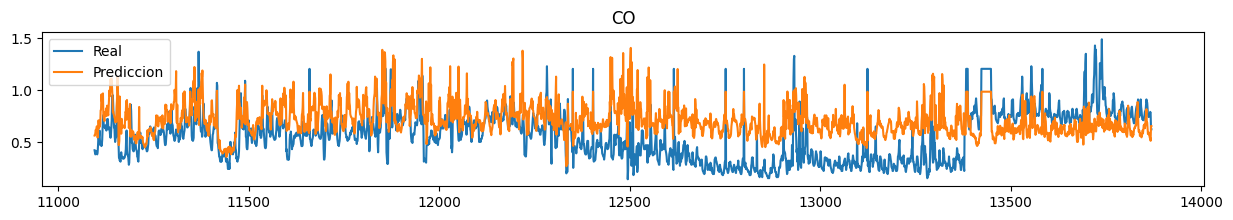

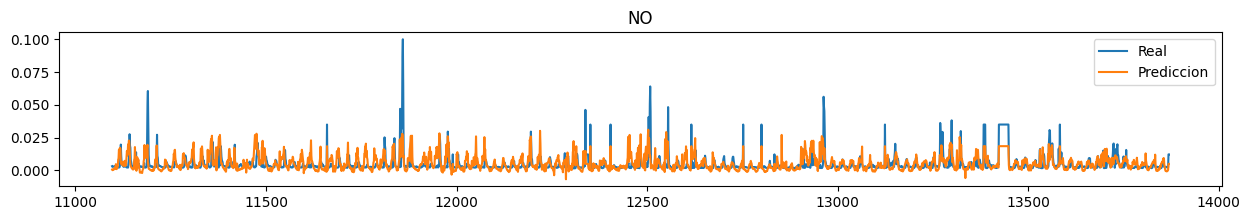

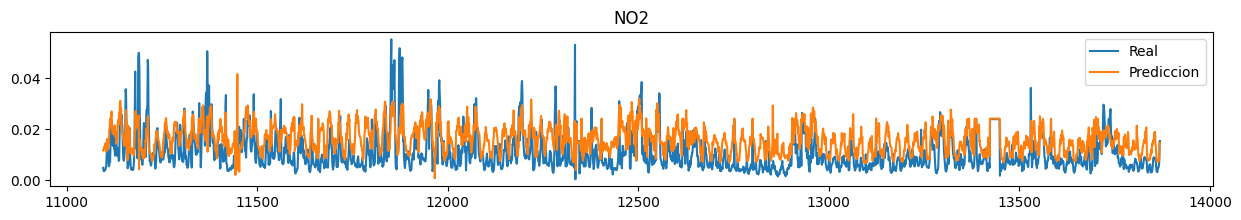

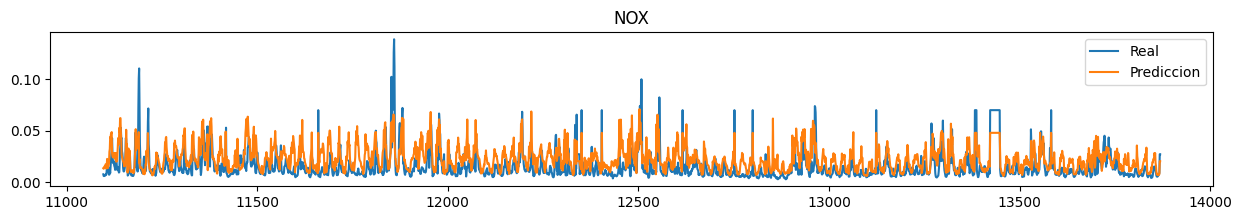

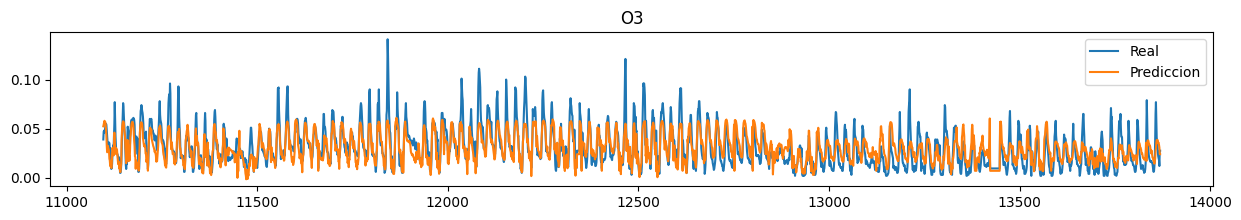

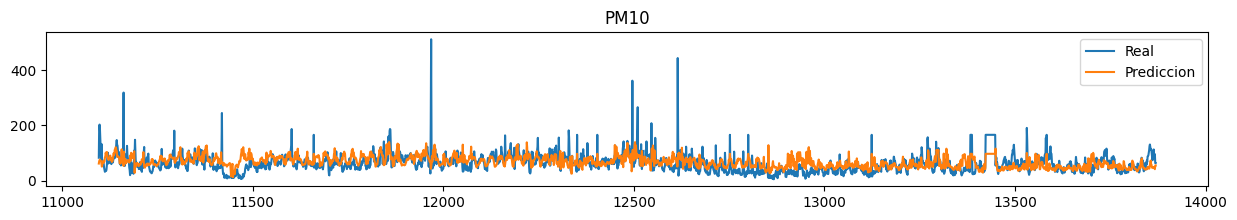

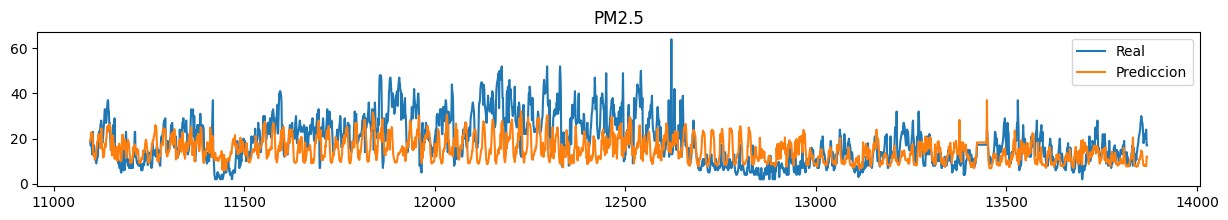

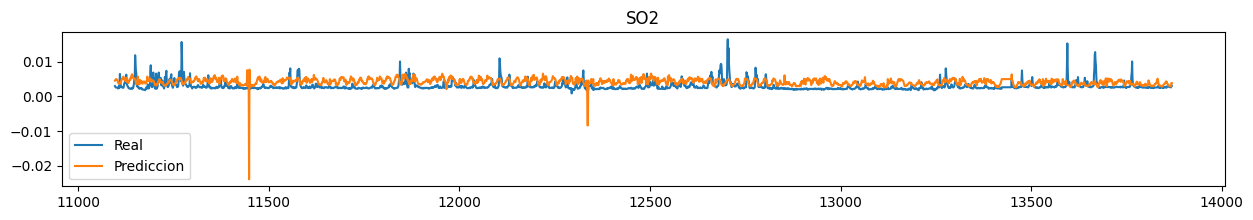

In [ ]:
# Graficar los datos

y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

# Con datos de NO


In [ ]:
# Modelo con todos los datos

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV','NO']]
y = data[['CO', 'O3', 'PM10', 'PM2.5', 'SO2','NO2','NOX']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Modelo LSTM

model = Sequential()
model.add(Input(shape=(1,7)))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(7))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.0001))
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(trainX,y_train,batch_size=96,epochs=300,verbose=1,validation_split=0.2,callbacks=[early_stopping,reduce_lr])
model.evaluate(testX,y_test)

Epoch 1/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 11.1747 - val_loss: 15.1290 - learning_rate: 1.0000e-04
Epoch 2/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9731 - val_loss: 15.1029 - learning_rate: 1.0000e-04
Epoch 3/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.0411 - val_loss: 15.0739 - learning_rate: 1.0000e-04
Epoch 4/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.0004 - val_loss: 15.0330 - learning_rate: 1.0000e-04
Epoch 5/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.6345 - val_loss: 14.9743 - learning_rate: 1.0000e-04
Epoch 6/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.3678 - val_loss: 14.8886 - learning_rate: 1.0000e-04
Epoch 7/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.8315 - val_loss: 14.7638 - learning_rate: 1.0000e-04
Epoch 8/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6317 - val_loss: 14.6057 - learning_rate: 1.0000e-04
Epoch 9/300
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8855 - val_loss: 14.

4.0786051750183105

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


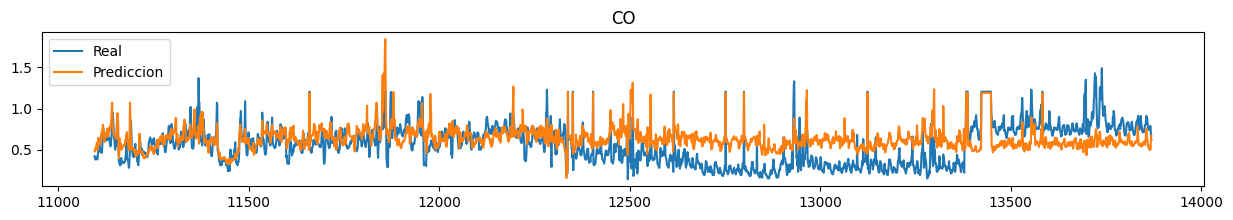

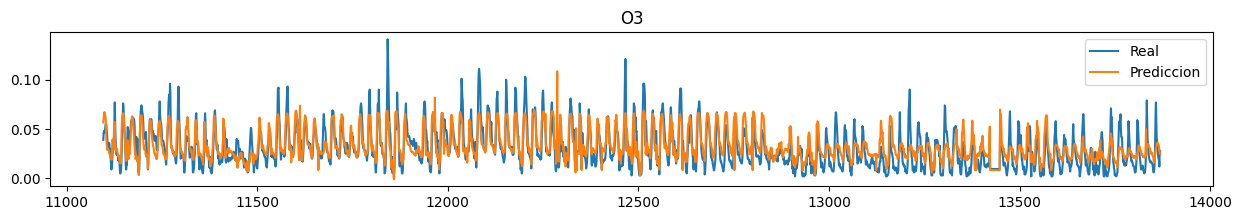

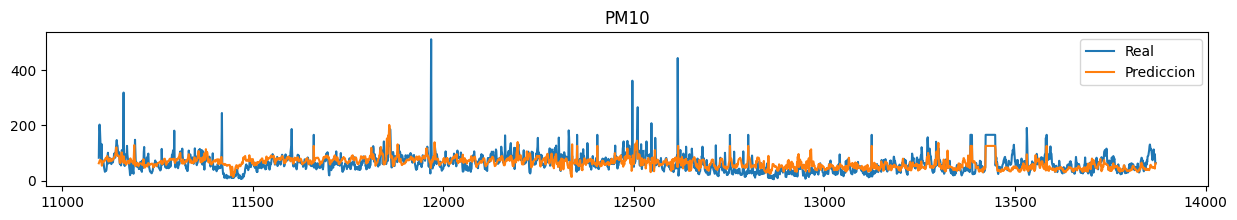

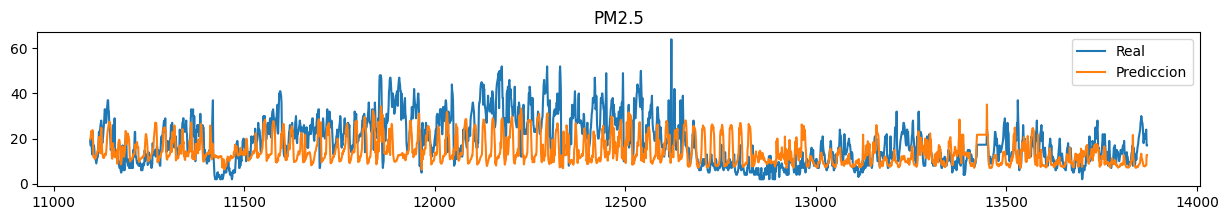

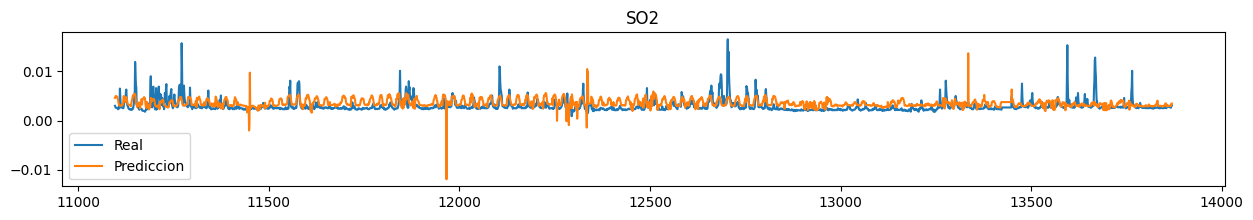

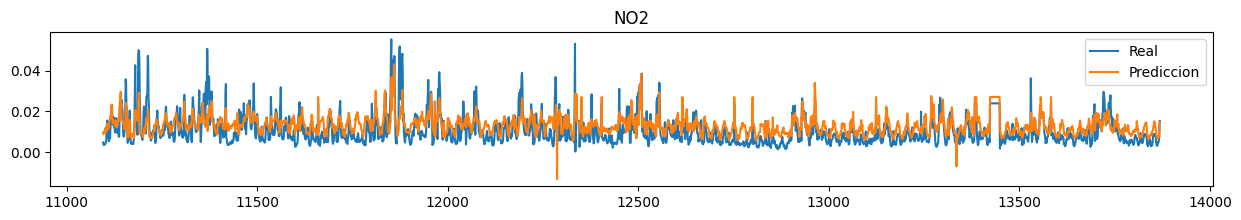

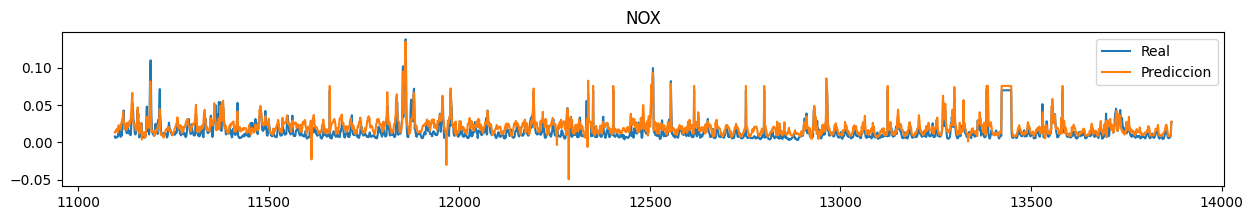

In [ ]:
y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

# Puros no antropogénicos

In [ ]:
# Solo datos antropogénicos para la predicción de O3

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV']]
y = data[['O3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(Input(shape=(1,6)))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.00001))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(trainX,y_train,batch_size=128,epochs=150,verbose=1,validation_split=0.2,callbacks=[early_stopping,reduce_lr])
model.evaluate(testX,y_test)

Epoch 1/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0428 - val_loss: 0.0221 - learning_rate: 1.0000e-05
Epoch 2/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0392 - val_loss: 0.0208 - learning_rate: 1.0000e-05
Epoch 3/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0381 - val_loss: 0.0197 - learning_rate: 1.0000e-05
Epoch 4/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0362 - val_loss: 0.0189 - learning_rate: 1.0000e-05
Epoch 5/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0348 - val_loss: 0.0182 - learning_rate: 1.0000e-05
Epoch 6/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0339 - val_loss: 0.0176 - learning_rate: 1.0000e-05
Epoch 7/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - val_loss: 0.0170 - learning_rate: 1.0000e-05
Epoch 8/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0311 - val_loss: 0.0165 - learning_rate: 1.0000e-05
Epoch 9/150
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - val_loss: 0.0161 - learnin

0.011679786257445812

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


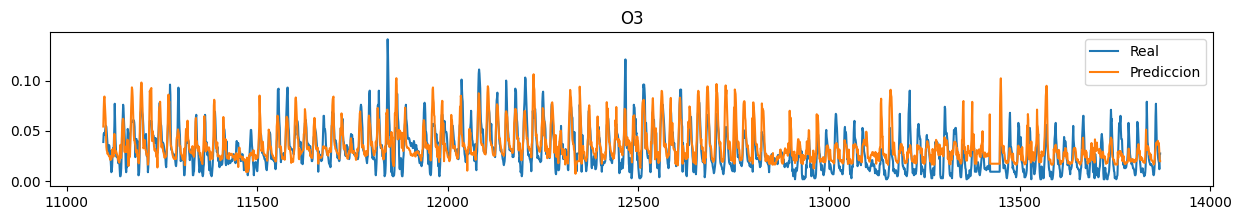

In [ ]:
y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)
df_prediccion_NA = df_prediccion.copy()

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

# Agregamos NO

In [ ]:
# Agregar NO a las variables predictoras

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV','NO']]
y = data[['O3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(Input(shape=(1,7)))

model.add(LSTM(120, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(80, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer=Adam(learning_rate=0.0001))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(trainX,y_train,batch_size=180,epochs=150,verbose=1,validation_split=0.2,callbacks=[early_stopping,reduce_lr])
model.evaluate(testX,y_test)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0486 - val_loss: 0.0177 - learning_rate: 1.0000e-04
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0348 - val_loss: 0.0155 - learning_rate: 1.0000e-04
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0272 - val_loss: 0.0149 - learning_rate: 1.0000e-04
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0227 - val_loss: 0.0144 - learning_rate: 1.0000e-04
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0196 - val_loss: 0.0141 - learning_rate: 1.0000e-04
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175 - val_loss: 0.0147 - learning_rate: 1.0000e-04
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0159 - val_loss: 0.0154 - learning_rate: 1.0000e-04
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0149 - val_loss: 0.0151 - learning_rate: 1.0000e-04
Epoch 9/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - val_loss: 0.0142 - learning

0.013718998059630394

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


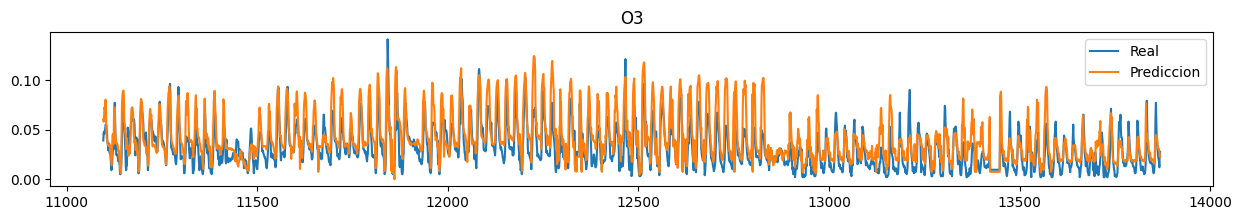

In [ ]:
y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)
df_prediccion_NO = df_prediccion.copy()

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

In [ ]:
# Agregamos NO y NO2

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV','NO','NO2']]
y = data[['O3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(Input(shape=(1,8)))

model.add(LSTM(130, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(80, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer=Adam(learning_rate=0.00001))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
history = model.fit(trainX,y_train,batch_size=164,epochs=150,verbose=1,validation_split=0.2,callbacks=[early_stopping,reduce_lr])
model.evaluate(testX,y_test)

Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0473 - val_loss: 0.0429 - learning_rate: 1.0000e-05
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - val_loss: 0.0362 - learning_rate: 1.0000e-05
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0393 - val_loss: 0.0312 - learning_rate: 1.0000e-05
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0368 - val_loss: 0.0276 - learning_rate: 1.0000e-05
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0356 - val_loss: 0.0247 - learning_rate: 1.0000e-05
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0335 - val_loss: 0.0230 - learning_rate: 1.0000e-05
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0326 - val_loss: 0.0217 - learning_rate: 1.0000e-05
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0320 - val_loss: 0.0206 - learning_rate: 1.0000e-05
Epoch 9/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0318 - val_loss: 0.0198 - lear

0.013843750581145287

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


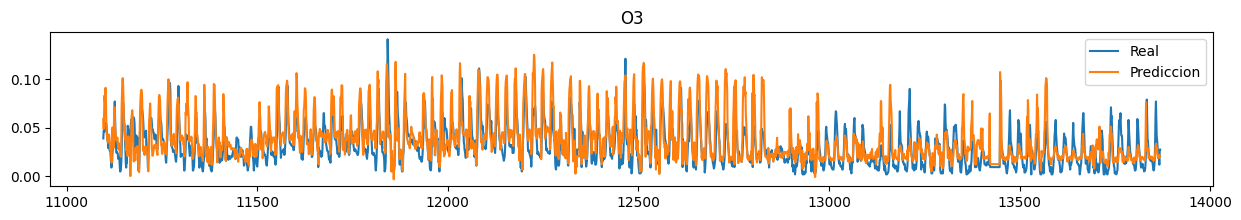

In [ ]:
y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)
df_prediccion_NO2 = df_prediccion.copy()

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

In [ ]:
# Agregamos NO, NO2 y NOX

X = data[['PRS', 'RH', 'SR', 'TOUT', 'WSR', 'WDV','NO','NO2','NOX']]
y = data[['O3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=16,shuffle=False)
trainX = X_train
testX = X_test
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(Input(shape=(1,9)))


model.add(LSTM(140, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer=Adam(learning_rate=0.000005))
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
history = model.fit(trainX,y_train,batch_size=164,epochs=150,verbose=1,validation_split=0.2,callbacks=[early_stopping])
model.evaluate(testX,y_test)

Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0699 - val_loss: 0.0548
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0637 - val_loss: 0.0489
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0574 - val_loss: 0.0435
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0523 - val_loss: 0.0387
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0469 - val_loss: 0.0343
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0422 - val_loss: 0.0303
Epoch 7/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0383 - val_loss: 0.0270
Epoch 8/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0349 - val_loss: 0.0243
Epoch 9/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0321 - val_loss: 0.0223
Epoch 10/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0303 - val_loss: 0.0210
Epoch 11/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0282 - val_loss: 0.0202
Epoch 12/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0

0.01965254172682762

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


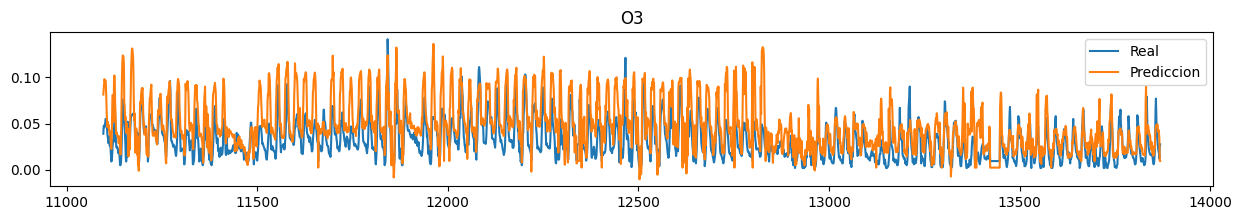

In [ ]:
y_pred=model.predict(testX)
df_real = pd.DataFrame(y_test,columns=y.columns)
df_prediccion = pd.DataFrame(y_pred,columns=y.columns,index=df_real.index)
df_prediccion_NOX = df_prediccion.copy()

for i in df_real.columns:
    plt.figure(figsize=(15,2))
    plt.plot(df_real[i])
    plt.plot(df_prediccion[i])
    plt.legend(['Real','Prediccion'])
    plt.title(i)
    plt.show()

In [ ]:
df_real.shape

(2774, 1)

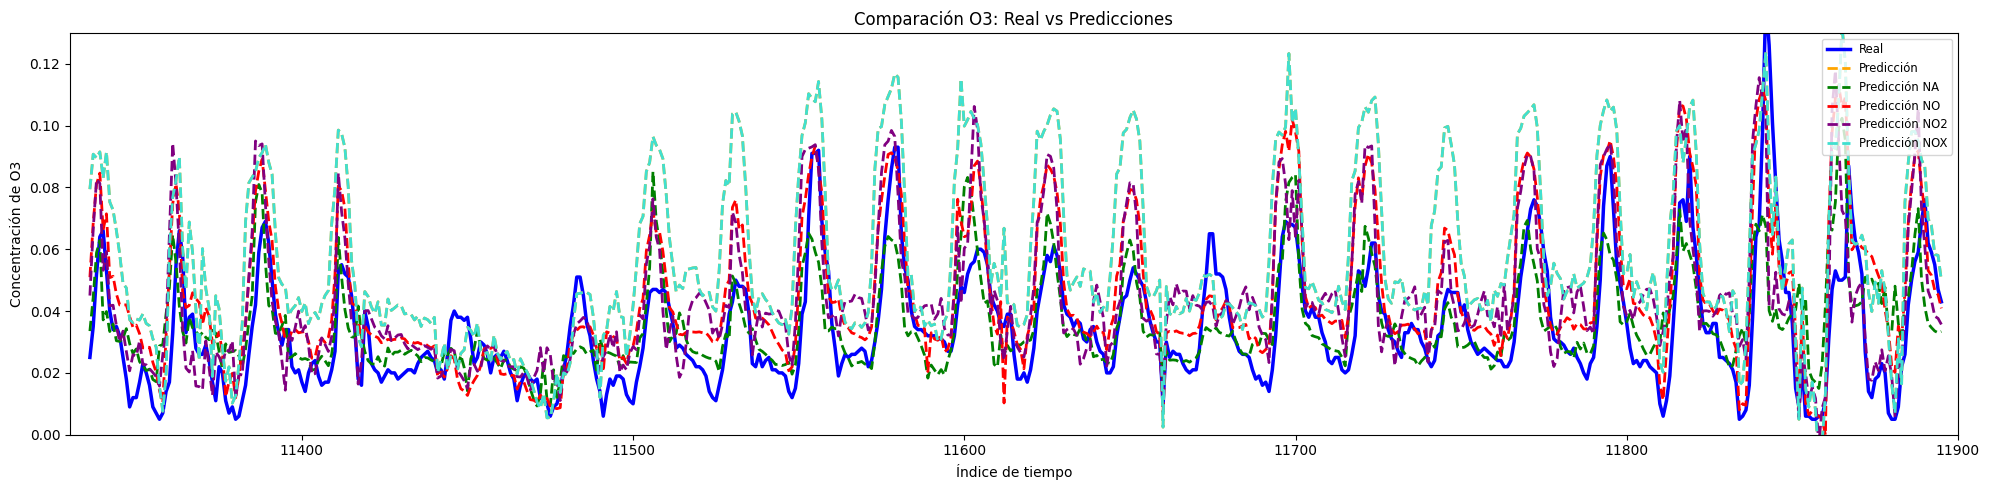

In [ ]:
# Graficar todos los modelos en una sola gráfica


plt.figure(figsize=(20, 5))

# Plot Real vs Predicciones con diferentes estilos y colores
plt.plot(df_real['O3'].iloc[240:800], color='blue', label='Real', linewidth=2.5)
plt.plot(df_prediccion['O3'].iloc[240:800], color='orange', label='Predicción', linewidth=2, linestyle='--')
plt.plot(df_prediccion_NA['O3'].iloc[240:800], color='green', label='Predicción NA', linewidth=2, linestyle='--')
plt.plot(df_prediccion_NO['O3'].iloc[240:800], color='red', label='Predicción NO', linewidth=2, linestyle='--')
plt.plot(df_prediccion_NO2['O3'].iloc[240:800], color='purple', label='Predicción NO2', linewidth=2, linestyle='--')
plt.plot(df_prediccion_NOX['O3'].iloc[240:800], color='turquoise', label='Predicción NOX', linewidth=2, linestyle='--')

# Añadir la leyenda con un tamaño más pequeño y en la esquina superior derecha
plt.legend(loc='upper right', fontsize='small')

# Añadir título y etiquetas a los ejes
plt.title('Comparación O3: Real vs Predicciones', fontsize=12)
plt.xlabel('Índice de tiempo', fontsize=10)
plt.ylabel('Concentración de O3', fontsize=10)

# Ajustar el límite de los ejes para evitar que se vea apretado
plt.ylim(0, 0.13)
plt.xlim(11330, 11900)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta los elementos del gráfico automáticamente para que no se superpongan
plt.show()
